# Task 3

# I201861 Shaheer Abdullah

In [3]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import cv2
import os
import random
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
from imblearn.over_sampling import SMOTE
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
imgarr = cv2.imread('train/0/0.jpg')

In [4]:
imgarr.shape

(48, 48, 3)

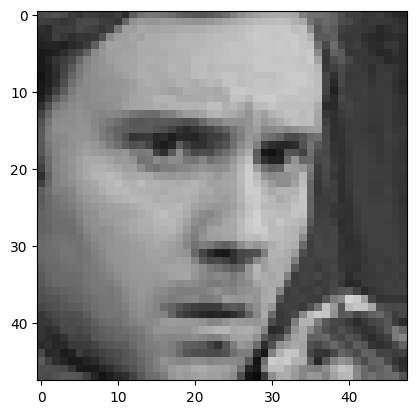

In [5]:
plt.imshow(imgarr)

In [6]:
DataDirectory="train/"

In [7]:
list_classes=['0','1','2','3','4','5','6']

In [8]:
img_size=128

In [9]:
total_data=[]
labels=[]

In [10]:
for class_label in list_classes:
    class_path = os.path.join(DataDirectory, class_label)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        img = cv2.imread(img_path)  # Read the image using OpenCV
        if img is not None:
            new_array = cv2.resize(img, (img_size, img_size))
            total_data.append(new_array)
            labels.append(class_label)

In [11]:
print(f'Total Images in the Data: {len(total_data)}')

Total Images in the Data: 28932


In [12]:
emotion_mapping = {
    '0': 'angry',
    '1': 'disgust',
    '2': 'fear',
    '3': 'happy',
    '4': 'neutral',
    '5': 'sad',
    '6': 'surprise'
}
class_counts = {label: 0 for label in list_classes}

for class_label in list_classes:
    class_path = os.path.join(DataDirectory, class_label)
    class_counts[class_label] = len(os.listdir(class_path))

for label, count in class_counts.items():
    emotion = emotion_mapping.get(label, 'Unknown')
    print(f"Emotion: {emotion} , {count} images")

Emotion: angry , 3993 images
Emotion: disgust , 547 images
Emotion: fear , 4103 images
Emotion: happy , 7164 images
Emotion: neutral , 4982 images
Emotion: sad , 4938 images
Emotion: surprise , 3205 images


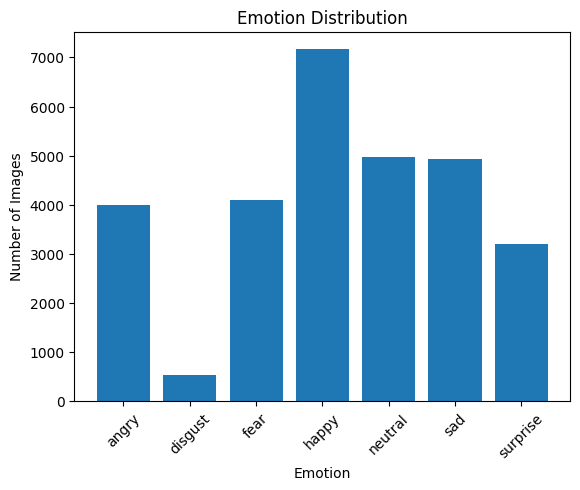

In [13]:
dict_Classes = {
    "angry": 3993,
    "disgust": 547,
    "fear": 4103,
    "happy": 7164,
    "neutral": 4982,
    "sad": 4938,
    "surprise": 3205
}
plt.bar(dict_Classes.keys(), dict_Classes.values())
plt.xlabel('Emotion')
plt.ylabel('Number of Images')
plt.title('Emotion Distribution')
plt.xticks(rotation=45)
plt.show()

Here are the distribution of each emotion. You can see the happy has a large number of samples

In [14]:
X = np.array(total_data)
Y = np.array(labels)

In [15]:
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

In [16]:
oversampler = RandomOverSampler(random_state=42)
data_resampled, labels_resampled = oversampler.fit_resample(X.reshape(-1, img_size * img_size * 3), labels_encoded)

In [17]:
# Resize the data to 128*128 pixels
data_resampled = data_resampled.reshape(-1, img_size, img_size, 3)

In [18]:
data_resampled.shape

(50148, 128, 128, 3)

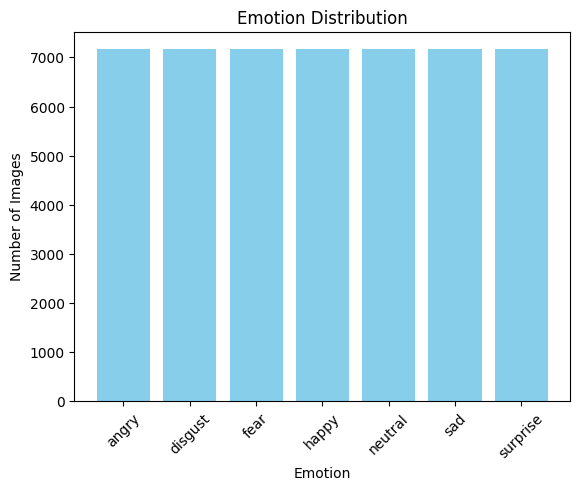

In [9]:
dict_Classes = {
    "angry":7164,
    "disgust":7164,
    "fear":7164 ,
    "happy": 7164,
    "neutral":7164 ,
    "sad":7164 ,
    "surprise":7164 
}
plt.bar(dict_Classes.keys(), dict_Classes.values(),color='skyblue')
plt.xlabel('Emotion')
plt.ylabel('Number of Images')
plt.title('Emotion Distribution')
plt.xticks(rotation=45)
plt.show()

In [19]:
onehot_encoder = OneHotEncoder(sparse=False)
labels_onehot = onehot_encoder.fit_transform(labels_resampled.reshape(-1, 1))

C:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [20]:
labels_resampled.shape

(50148,)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data_resampled, labels_onehot, test_size=0.2, random_state=42)

In [22]:
len(X_train),len(y_train)

(40118, 40118)

In [23]:
model = keras.Sequential([
    #1st layer
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    #2nd layer
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    #3rd layer
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    # Flatten layer
    keras.layers.Flatten(),
    #fully connected layer
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len(list_classes), activation='softmax')
])

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1254/1254 [==============================] - 395s 313ms/step - loss: 2.3012 - accuracy: 0.3455 - val_loss: 1.3894 - val_accuracy: 0.4720
Epoch 2/10
1254/1254 [==============================] - 393s 313ms/step - loss: 1.1858 - accuracy: 0.5533 - val_loss: 1.1252 - val_accuracy: 0.5867
Epoch 3/10
1254/1254 [==============================] - 390s 311ms/step - loss: 0.8780 - accuracy: 0.6819 - val_loss: 1.0645 - val_accuracy: 0.6329
Epoch 4/10
1254/1254 [==============================] - 411s 328ms/step - loss: 0.6490 - accuracy: 0.7716 - val_loss: 0.9592 - val_accuracy: 0.6986
Epoch 5/10
1254/1254 [==============================] - 441s 352ms/step - loss: 0.4658 - accuracy: 0.8398 - val_loss: 1.1577 - val_accuracy: 0.7140
Epoch 6/10
1254/1254 [==============================] - 448s 357ms/step - loss: 0.3518 - accuracy: 0.8819 - val_loss: 1.1848 - val_accuracy: 0.7345
Epoch 7/10
1254/1254 [==============================] - 441s 352ms/step - loss: 0.2702 - accuracy: 0.9145 - val_

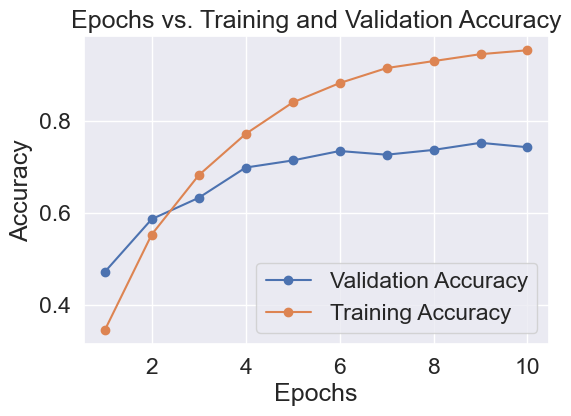

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Define your data
epochs = np.arange(1, 11)  # 1 to 10 epochs
val_acc = [0.4720, 0.5867, 0.6329, 0.6986, 0.7140, 0.7345, 0.7265, 0.7369, 0.7523, 0.7427]  # Validation accuracy
train_acc = [0.3455, 0.5533, 0.6819, 0.7716, 0.8398, 0.8819, 0.9145, 0.9297, 0.9447, 0.9532]  # Training accuracy

# Create the plot
plt.figure(figsize=(6, 4))
plt.plot(epochs, val_acc, marker='o', label='Validation Accuracy', linestyle='-')
plt.plot(epochs, train_acc, marker='o', label='Training Accuracy', linestyle='-')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epochs vs. Training and Validation Accuracy')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


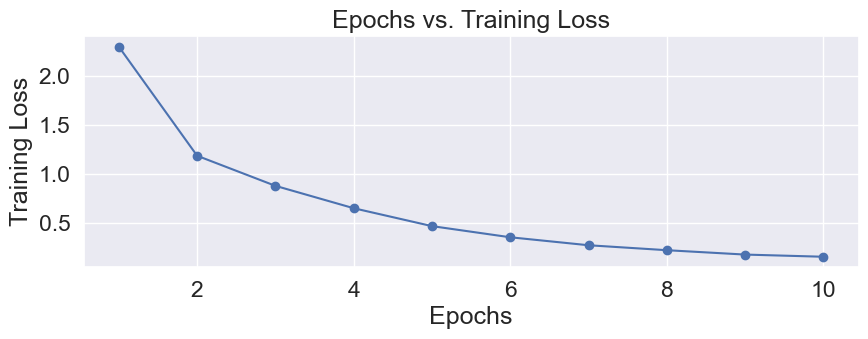

In [62]:

epochs = np.arange(1, 11)  # 1 to 10 epochs
train_loss = [2.3012, 1.1858, 0.8780, 0.6490, 0.4658, 0.3518, 0.2702, 0.2195, 0.1748, 0.1525]  # Training loss
# Create the plot
plt.figure(figsize=(10,3))
plt.plot(epochs, train_loss, marker='o', label='Training Loss', linestyle='-')
# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Epochs vs. Training Loss')
# Show the plot
plt.grid(True)
plt.show()

In [42]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'\nTest accuracy: {test_acc}')

314/314 [==============================] - 24s 75ms/step - loss: 1.7416 - accuracy: 0.7427

Test accuracy: 0.7426719665527344


In [51]:
np.random.seed(42)
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert one-hot encoded y_test to class indices
y_test_classes = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


314/314 [==============================] - 23s 75ms/step
Precision: 0.7428
Recall: 0.7427
F1-Score: 0.7415


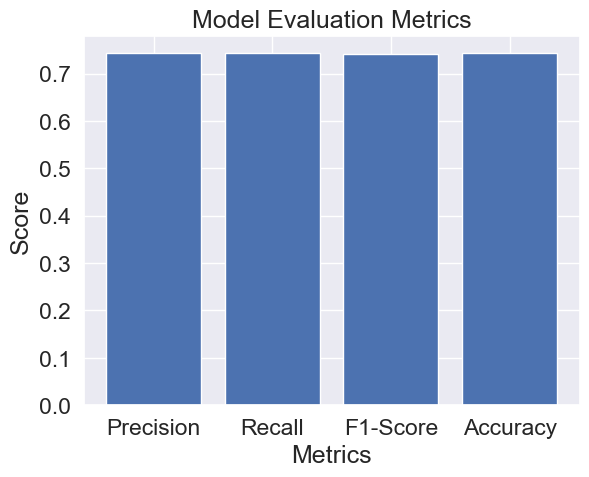

In [64]:
metrics = {
    'Precision': 0.7428,
    'Recall': 0.7427,
    'F1-Score': 0.7415,
    'Accuracy': 0.7426,
}

plt.bar(metrics.keys(), metrics.values()) 
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.show()

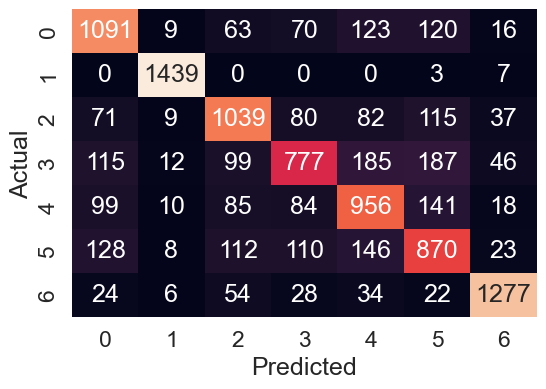

In [52]:
#Confusion Matrix
conf_matrix=confusion_matrix(y_test_classes,y_pred_classes)
sns.set(font_scale=1.5)
# Function to plot confusion matrix
def plot_conf_mat(conf_matrix):
    plt.figure(figsize=(6,4))
    ax = sns.heatmap(conf_matrix, annot=True, cbar=False, fmt='d')
    # Add labels
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
plot_conf_mat(conf_matrix)
# Show the plot
plt.show()

I have applied the Oversampling and the model is giving 75% accuracy.